In [25]:
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import bs4
from urllib.request import urlopen
import seaborn as sns





In [4]:
url = urlopen('http://www.hubertiming.com/results/2017GPTR10K')

soup = bs4.BeautifulSoup(url, 'html.parser')

In [6]:
theaders = soup.find_all('th')

table_headers = []
for title in theaders:
    table_headers.append(title.getText())
    
t_rows= soup.find_all('tr')


In [7]:
rows_list = []
for rows in t_rows[5:577]:
    td = rows.find_all('td')

    for text in td:
        td_text = text.getText().strip()
        # print(td_text)
        rows_list.append(td_text)

In [8]:
#Break a list into chunks of size N
n = 8

formated_list  = [rows_list[i * n:(i + 1) * n] for i in range((len(rows_list) + n - 1) // n )]


In [9]:
df = pd.DataFrame(data=formated_list)
df.columns = table_headers

In [12]:
df

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
0,1,814,JARED WILSON,M,TIGARD,36:21,36:24,
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,36:42,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,37:44,37:48,
3,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,
4,5,569,DEREK G OSBORNE,M,HILLSBORO,39:21,39:24,INTEL TEAM F
...,...,...,...,...,...,...,...,...
567,568,51,AIMEE TONEY-LOVINGS,F,BEAVERTON,1:32:30,1:33:01,
568,569,158,NARENDER MUDUGANTI,M,HILLSBORO,1:33:50,1:33:54,
569,570,670,HEMA VIJWANI,F,HILLSBORO,1:34:45,1:34:53,
570,571,357,USHA K KETINENI,F,PORTLAND,1:34:48,1:35:27,


In [14]:
#Changing chip time from str to float

time_list = df['Chip Time'].to_list()
time_mins = []


In [15]:
for i in time_list:

    time  = str(i).split(':')
    if len(time) ==2:
        math = (int(time[0])*60 + int(time[1]))/60
    else:
        math =(int(time[0])*3600 + int(time[1])*60 + int(time[2]))/60
    time_mins.append(round(math,2))

In [16]:
#Adding new column
df['Runner_mins']= time_mins


In [18]:
df.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team,Runner_mins
0,1,814,JARED WILSON,M,TIGARD,36:21,36:24,,36.35
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,36:42,36:45,INTEL TEAM F,36.70
2,3,687,FRANCISCO MAYA,M,PORTLAND,37:44,37:48,,37.73
3,4,623,PAUL MORROW,M,BEAVERTON,38:34,38:37,,38.57
4,5,569,DEREK G OSBORNE,M,HILLSBORO,39:21,39:24,INTEL TEAM F,39.35


In [39]:
#Getting avg finish time (mean)
df['Runner_mins'].describe()
#Mean time from all cyclist was 59.69 mins!

count    572.000000
mean      59.691154
std       11.436696
min       36.350000
25%       50.830000
50%       58.975000
75%       67.110000
max       97.170000
Name: Runner_mins, dtype: float64

In [20]:
# For data visualization, it is convenient to first import parameters from the 
# pylab module that comes with matplotlib and set 
# the same size for all figures to avoid doing it for each figure.
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x2a6fac98dc0>], [Text(1, 0, 'Runners')])

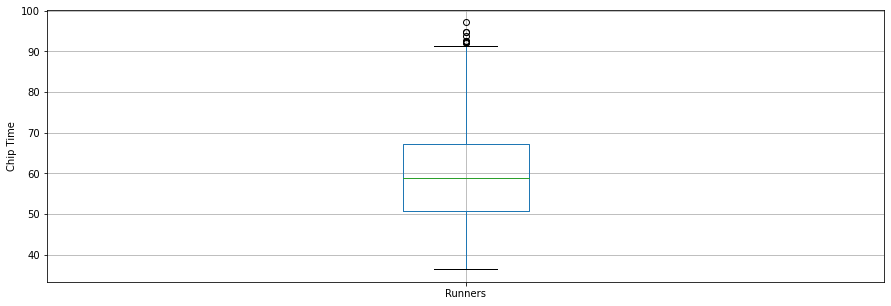

In [23]:
#Grafical representation of AVG time with Boxplot
df.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

C:\Users\gchax\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


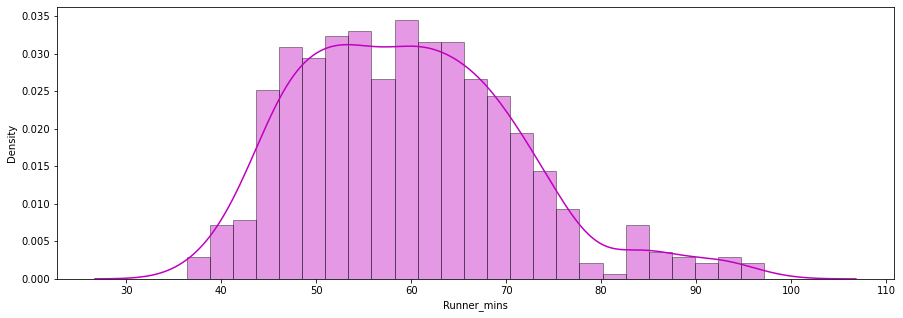

In [26]:
# Did the runners' finish times follow a normal distribution?

x = df['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

# Below is a distribution plot of runners' chip times plotted using the seaborn library. 
# The distribution looks almost normal.

In [27]:
# The third question deals with whether there were any performance
# differences between males and females of various age groups. 
# Below is a distribution plot of chip times for males and females.

C:\Users\gchax\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gchax\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


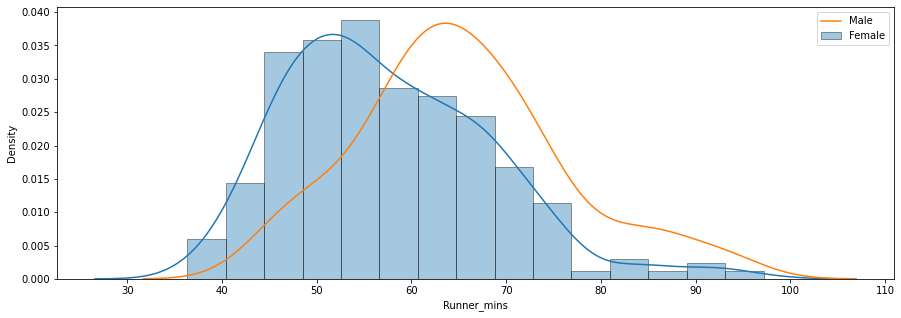

In [35]:
# The third question deals with whether there were any performance differences
# between males and females of various age groups.
# Below is a distribution plot of chip times for males and females.

male_ = df.loc[df['Gender']=='F']['Runner_mins']
female_ = df.loc[df['Gender']=='M']['Runner_mins']

sns.distplot(female_, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(male_, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [40]:
g_stats = df.groupby("Gender", as_index=True).describe()
print(g_stats)

# The distribution indicates that females were slower than males on average.

       Runner_mins                                                          
             count       mean        std    min    25%    50%     75%    max
Gender                                                                      
F            159.0  65.274025  11.084610  43.77  58.66  64.37  71.435  94.80
M            413.0  57.541816  10.839599  36.35  49.38  55.75  64.670  97.17


Text(0.5, 0.98, '')

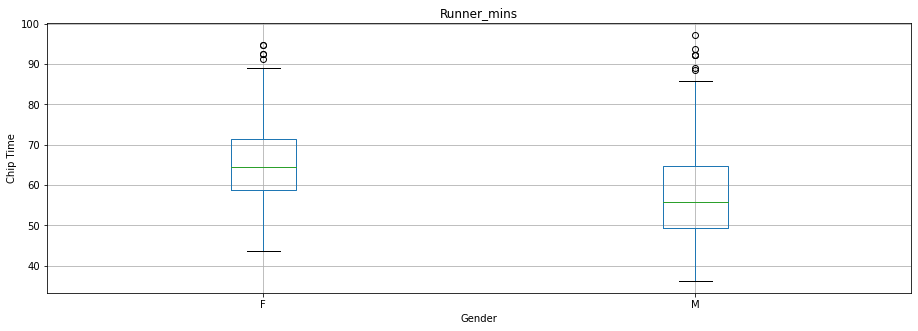

In [38]:
df.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')
plt.suptitle("")